In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
dataset = pd.read_csv('C:\Ashutosh\SOC 2023\Assignment\data.csv')

In [4]:
print(dataset['obligorCreditScore'].min())

0


In [5]:
bin_edges = [0, 600, 675, 750, 825, 900]
bin_labels = ['0-600', '600-675', '675-750', '750-825', '825-900']

In [14]:
dataset['buckets'] = pd.cut(dataset['obligorCreditScore'], bins=bin_edges, labels=bin_labels)

In [15]:
dataset['defaultFlag'] = dataset['beginningLoanBal'] == dataset['endingLoanBal']

In [31]:
defaulted = dataset[dataset['defaultFlag'] == True].groupby(dataset['buckets'])['defaultFlag'].count()
avg_default_rate = defaulted.values / dataset['buckets'].value_counts() * 100
print(avg_default_rate)

buckets
675-750     0.000000
750-825     1.831623
825-900    13.651797
600-675    23.357664
0-600            inf
Name: count, dtype: float64


Text(0.5, 0, 'Obligor Credit Score Bins')

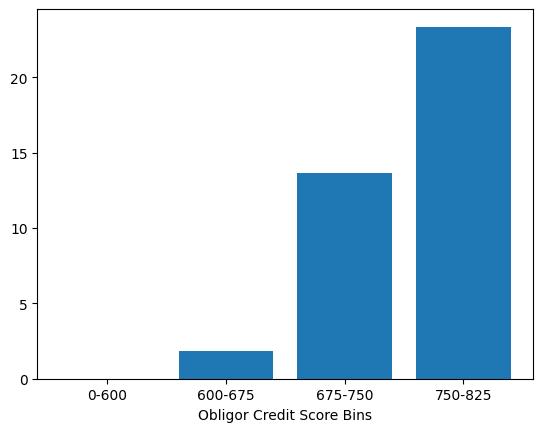

In [32]:
plt.bar(bin_labels, avg_default_rate.values)
plt.xlabel('Obligor Credit Score Bins')
